# Fase A: Exploratory Data Analysis (EDA) - BigMart Sales Dataset

## Objetivo
Realizar un análisis exploratorio completo del dataset BigMart Sales para entender la estructura, calidad y características de los datos antes de proceder con el clustering de productos.

## Contexto de Negocio
El dataset contiene información de ventas de 1,559 productos distribuidos en 10 tiendas de diferentes ciudades. Incluye atributos del producto (peso, contenido graso, visibilidad, tipo, precio) y de la tienda (año de establecimiento, tamaño, ubicación, tipo). El objetivo final es segmentar productos según su comportamiento de ventas y características para analizar la mezcla de productos por tienda.

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

In [2]:
# Cargar datos
df = pd.read_csv('../Data/Raw/train.csv')
print("✓ Dataset cargado exitosamente")
print(f"Dimensiones del dataset: {df.shape}")
print(f"Número de registros: {df.shape[0]}")
print(f"Número de variables: {df.shape[1]}")

✓ Dataset cargado exitosamente
Dimensiones del dataset: (8523, 12)
Número de registros: 8523
Número de variables: 12


## 1. Información General del Dataset

In [3]:
# Información general
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*50)
df.info()
print("\n" + "="*50)
print("PRIMERAS FILAS DEL DATASET")
print("="*50)
display(df.head())

INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB

PRIMERAS FIL

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Tipos de datos
print("DISTRIBUCIÓN DE TIPOS DE DATOS")
print("="*50)
print(df.dtypes.value_counts())
print("\n")

# Valores únicos por columna
print("NÚMERO DE VALORES ÚNICOS POR COLUMNA")
print("="*50)
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} valores únicos")
    if unique_count <= 15:
        print(f"   Valores: {df[col].unique()}")

DISTRIBUCIÓN DE TIPOS DE DATOS
object     7
float64    4
int64      1
Name: count, dtype: int64


NÚMERO DE VALORES ÚNICOS POR COLUMNA
Item_Identifier: 1559 valores únicos
Item_Weight: 415 valores únicos
Item_Fat_Content: 5 valores únicos
   Valores: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Visibility: 7880 valores únicos
Item_Type: 16 valores únicos
Item_MRP: 5938 valores únicos
Outlet_Identifier: 10 valores únicos
   Valores: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Establishment_Year: 9 valores únicos
   Valores: [1999 2009 1998 1987 1985 2002 2007 1997 2004]
Outlet_Size: 3 valores únicos
   Valores: ['Medium' nan 'High' 'Small']
Outlet_Location_Type: 3 valores únicos
   Valores: ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type: 4 valores únicos
   Valores: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Item_Outlet_Sales: 3493 valores únicos


## 2. Estadísticas Descriptivas - Variables Numéricas

In [5]:
# Seleccionar variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Variables numéricas: {numeric_cols}")

# Estadísticas descriptivas
print("\nESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("="*70)
display(df[numeric_cols].describe())

Variables numéricas: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


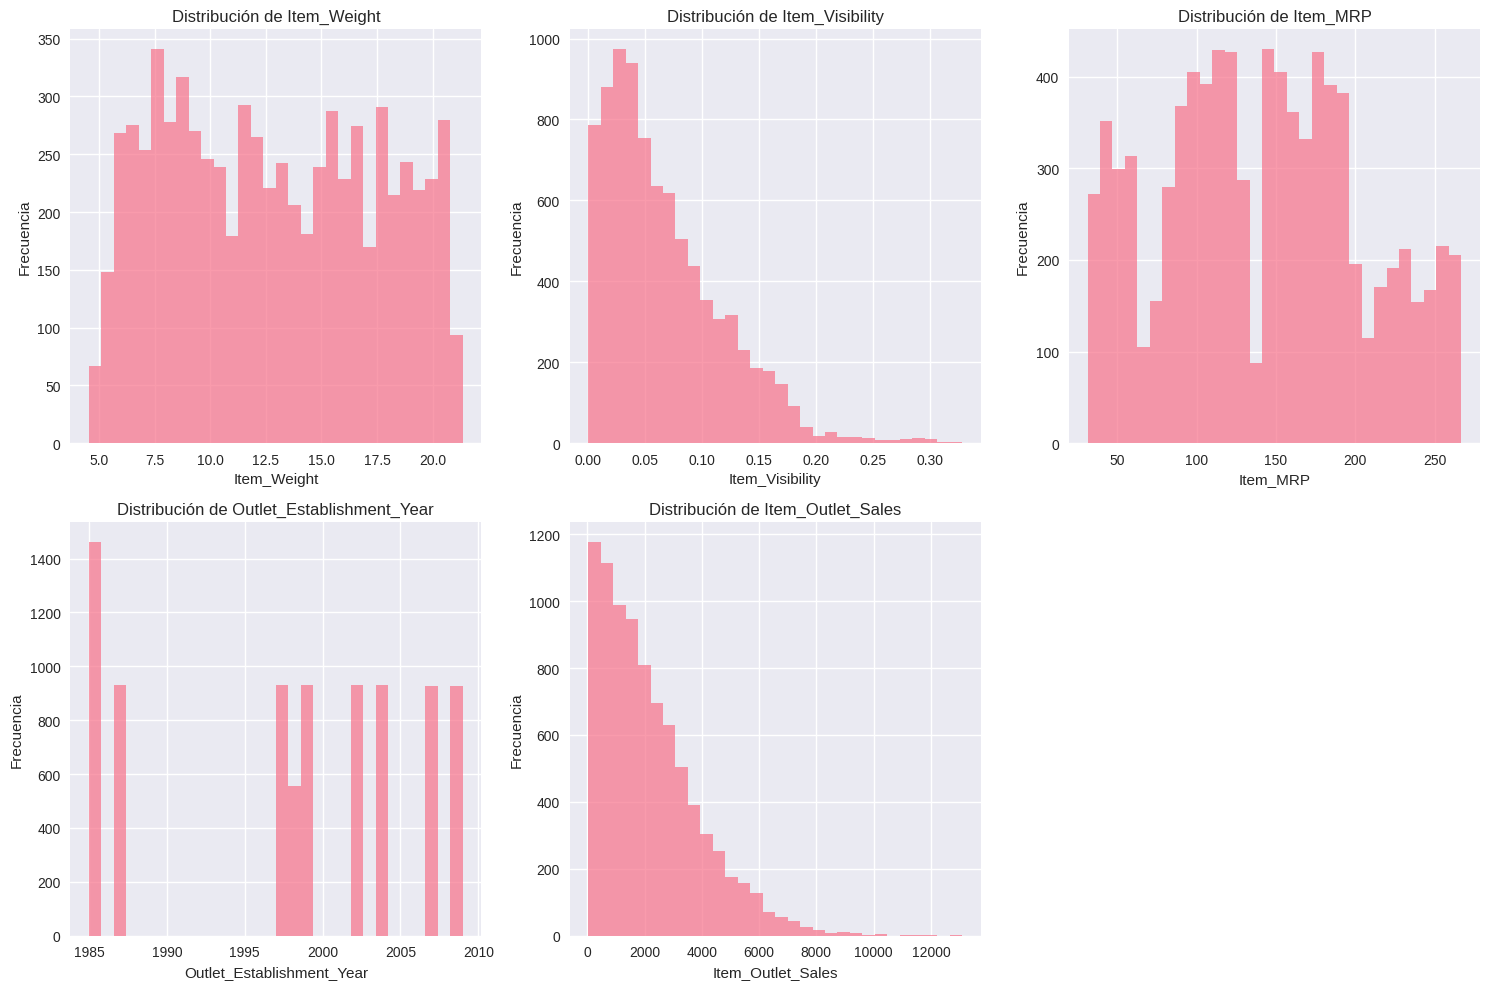


ANÁLISIS DE DISTRIBUCIONES:
------------------------------
Item_Weight: Asimetría = 0.08
   → Distribución aproximadamente simétrica
Item_Visibility: Asimetría = 1.17
   → Distribución altamente sesgada
Item_MRP: Asimetría = 0.13
   → Distribución aproximadamente simétrica
Outlet_Establishment_Year: Asimetría = -0.40
   → Distribución aproximadamente simétrica
Item_Outlet_Sales: Asimetría = 1.18
   → Distribución altamente sesgada


In [6]:
# Distribución de variables numéricas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        df[col].hist(bins=30, ax=axes[i], alpha=0.7)
        axes[i].set_title(f'Distribución de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')

# Eliminar ejes vacíos
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

print("\nANÁLISIS DE DISTRIBUCIONES:")
print("-" * 30)
for col in numeric_cols:
    skewness = df[col].skew()
    print(f"{col}: Asimetría = {skewness:.2f}")
    if abs(skewness) > 1:
        print(f"   → Distribución altamente sesgada")
    elif abs(skewness) > 0.5:
        print(f"   → Distribución moderadamente sesgada")
    else:
        print(f"   → Distribución aproximadamente simétrica")

## 3. Estadísticas Descriptivas - Variables Categóricas

In [7]:
# Seleccionar variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Variables categóricas: {categorical_cols}")

# Estadísticas de variables categóricas
print("\nESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
print("="*70)
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Número de categorías: {df[col].nunique()}")
    print(f"  Categorías: {df[col].unique()}")
    print(f"  Frecuencias:")
    display(pd.DataFrame(df[col].value_counts()).T)

Variables categóricas: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS

Item_Identifier:
  Número de categorías: 1559
  Categorías: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
  Frecuencias:


Item_Identifier,FDW13,FDG33,FDX31,FDT07,NCY18,FDW26,NCQ06,DRN47,FDV38,FDX20,...,NCM42,FDQ60,FDY43,DRF48,FDC23,FDO33,FDK57,FDT35,FDN52,FDE52
count,10,10,9,9,9,9,9,9,9,9,...,2,1,1,1,1,1,1,1,1,1



Item_Fat_Content:
  Número de categorías: 5
  Categorías: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
  Frecuencias:


Item_Fat_Content,Low Fat,Regular,LF,reg,low fat
count,5089,2889,316,117,112



Item_Type:
  Número de categorías: 16
  Categorías: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
  Frecuencias:


Item_Type,Fruits and Vegetables,Snack Foods,Household,Frozen Foods,Dairy,Canned,Baking Goods,Health and Hygiene,Soft Drinks,Meat,Breads,Hard Drinks,Others,Starchy Foods,Breakfast,Seafood
count,1232,1200,910,856,682,649,648,520,445,425,251,214,169,148,110,64



Outlet_Identifier:
  Número de categorías: 10
  Categorías: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
  Frecuencias:


Outlet_Identifier,OUT027,OUT013,OUT035,OUT049,OUT046,OUT045,OUT018,OUT017,OUT010,OUT019
count,935,932,930,930,930,929,928,926,555,528



Outlet_Size:
  Número de categorías: 3
  Categorías: ['Medium' nan 'High' 'Small']
  Frecuencias:


Outlet_Size,Medium,Small,High
count,2793,2388,932



Outlet_Location_Type:
  Número de categorías: 3
  Categorías: ['Tier 1' 'Tier 3' 'Tier 2']
  Frecuencias:


Outlet_Location_Type,Tier 3,Tier 2,Tier 1
count,3350,2785,2388



Outlet_Type:
  Número de categorías: 4
  Categorías: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
  Frecuencias:


Outlet_Type,Supermarket Type1,Grocery Store,Supermarket Type3,Supermarket Type2
count,5577,1083,935,928


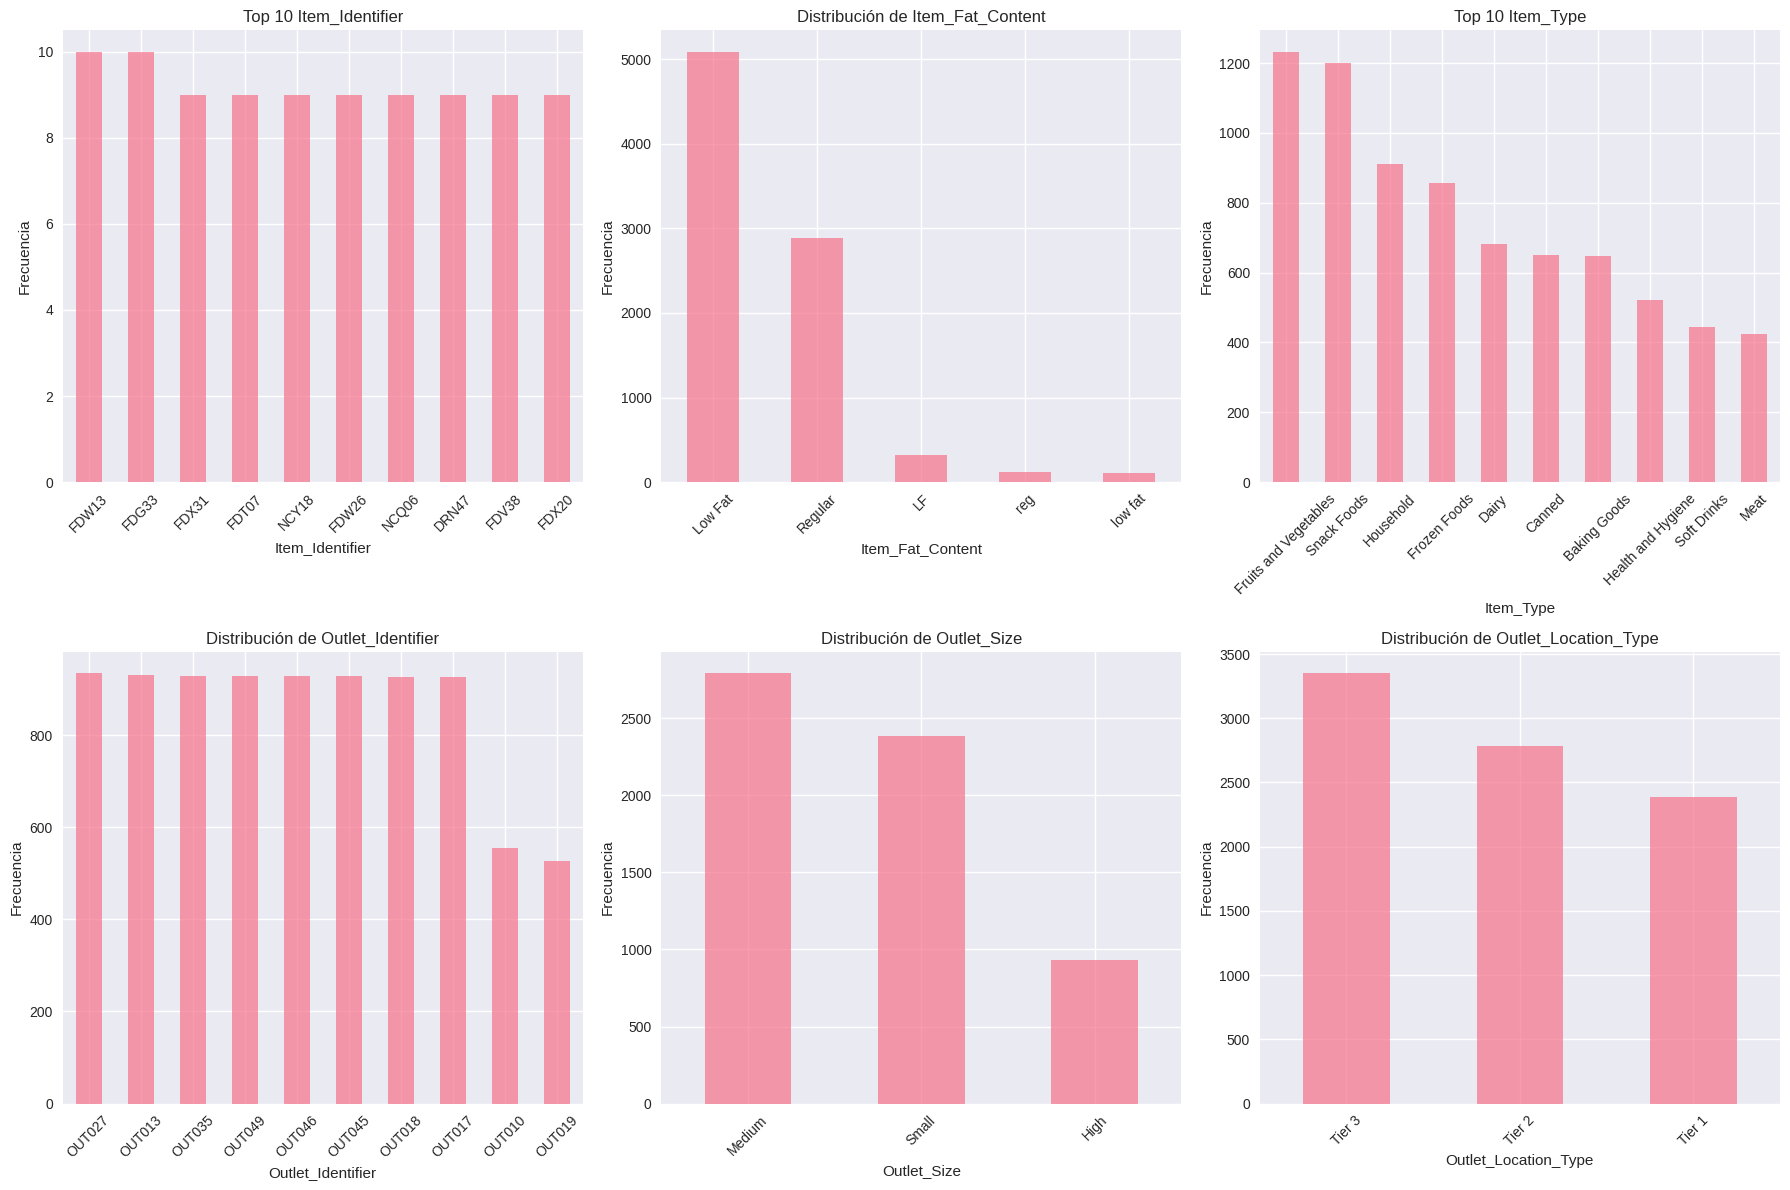


HALLazgos principales variables categóricas:
--------------------------------------------------
• Item_Identifier: 1559 productos únicos (variable de identificación)
• Item_Fat_Content: Se observan inconsistencias en categorías (Low Fat, LF, low fat)
• Item_Type: 16 categorías de productos, siendo Fruits and Vegetables la más común
• Outlet_Identifier: 10 tiendas únicas
• Outlet_Size: Presencia de valores nulos
• Outlet_Location_Type: 3 tipos de ubicación
• Outlet_Type: 4 tipos de tienda


In [8]:
# Visualización de variables categóricas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        # Para variables con muchas categorías, mostrar solo las top 10
        if df[col].nunique() > 10:
            top_categories = df[col].value_counts().head(10)
            top_categories.plot(kind='bar', ax=axes[i], alpha=0.7)
            axes[i].set_title(f'Top 10 {col}')
        else:
            df[col].value_counts().plot(kind='bar', ax=axes[i], alpha=0.7)
            axes[i].set_title(f'Distribución de {col}')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_ylabel('Frecuencia')

# Eliminar ejes vacíos
for i in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

print("\nHALLazgos principales variables categóricas:")
print("-" * 50)
print("• Item_Identifier: 1559 productos únicos (variable de identificación)")
print("• Item_Fat_Content: Se observan inconsistencias en categorías (Low Fat, LF, low fat)")
print("• Item_Type: 16 categorías de productos, siendo Fruits and Vegetables la más común")
print("• Outlet_Identifier: 10 tiendas únicas")
print("• Outlet_Size: Presencia de valores nulos")
print("• Outlet_Location_Type: 3 tipos de ubicación")
print("• Outlet_Type: 4 tipos de tienda")

## 4. Análisis de Valores Faltantes

ANÁLISIS DE VALORES FALTANTES
Columnas con valores faltantes:


,Columna,Valores Faltantes,Porcentaje
8,Outlet_Size,2410,28.276428
1,Item_Weight,1463,17.165317


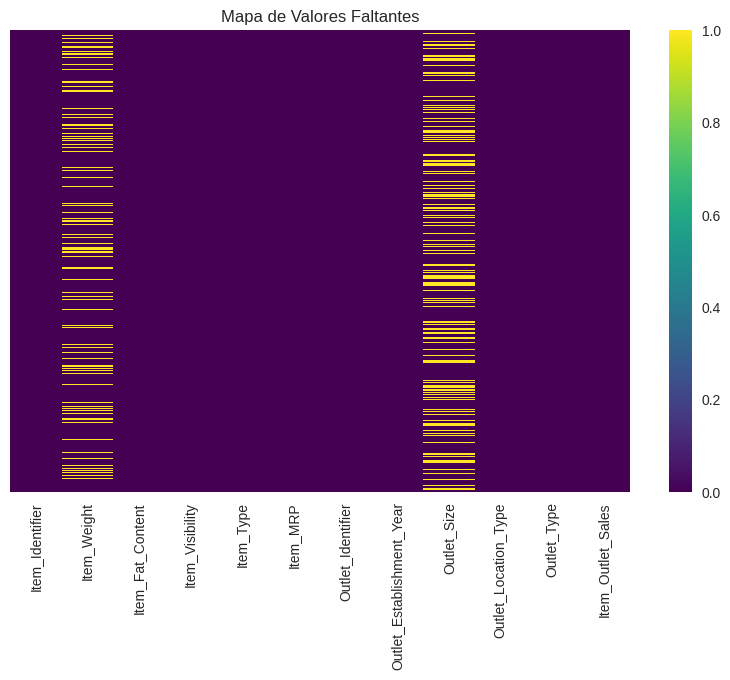


ANÁLISIS POR COLUMNA:
------------------------------
Outlet_Size: 2410 valores faltantes (28.28%)
Item_Weight: 1463 valores faltantes (17.17%)


In [9]:
# Análisis de valores faltantes
print("ANÁLISIS DE VALORES FALTANTES")
print("="*50)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores Faltantes': missing_data.values,
    'Porcentaje': missing_percent.values
})
missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Porcentaje', ascending=False)

if len(missing_df) > 0:
    print("Columnas con valores faltantes:")
    display(missing_df)
else:
    print("✓ No hay valores faltantes en el dataset")

# Visualización de valores faltantes
if len(missing_df) > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Mapa de Valores Faltantes')
    plt.show()

    print("\nANÁLISIS POR COLUMNA:")
    print("-" * 30)
    for col in missing_df['Columna']:
        print(f"{col}: {missing_df[missing_df['Columna'] == col]['Valores Faltantes'].values[0]} valores faltantes "
              f"({missing_df[missing_df['Columna'] == col]['Porcentaje'].values[0]:.2f}%)")

## 5. Análisis de Registros Duplicados

In [10]:
# Análisis de duplicados
print("ANÁLISIS DE REGISTROS DUPLICADOS")
print("="*50)

# Duplicados exactos
exact_duplicates = df.duplicated().sum()
print(f"Registros duplicados exactos: {exact_duplicates}")

# Duplicados por combinación producto-tienda (que deberían ser únicos)
key_duplicates = df.duplicated(subset=['Item_Identifier', 'Outlet_Identifier']).sum()
print(f"Duplicados en combinación Producto-Tienda: {key_duplicates}")

if key_duplicates > 0:
    print("\n¡ALERTA! Se encontraron duplicados en la llave natural (Producto-Tienda)")
    print("Esto podría indicar problemas en la calidad de los datos")
    
    # Mostrar duplicados
    duplicates = df[df.duplicated(subset=['Item_Identifier', 'Outlet_Identifier'], keep=False)]
    print("\nRegistros duplicados:")
    display(duplicates.sort_values(['Item_Identifier', 'Outlet_Identifier']))
else:
    print("\n✓ No hay duplicados en la combinación Producto-Tienda")

ANÁLISIS DE REGISTROS DUPLICADOS
Registros duplicados exactos: 0
Duplicados en combinación Producto-Tienda: 0

✓ No hay duplicados en la combinación Producto-Tienda


## 6. Análisis de la Variable Objetivo (Item_Outlet_Sales)

ANÁLISIS DE LA VARIABLE OBJETIVO: Item_Outlet_Sales
Estadísticas descriptivas:


,count,mean,std,min,25%,50%,75%,max
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.29,834.2474,1794.331,3101.2964,13086.9648


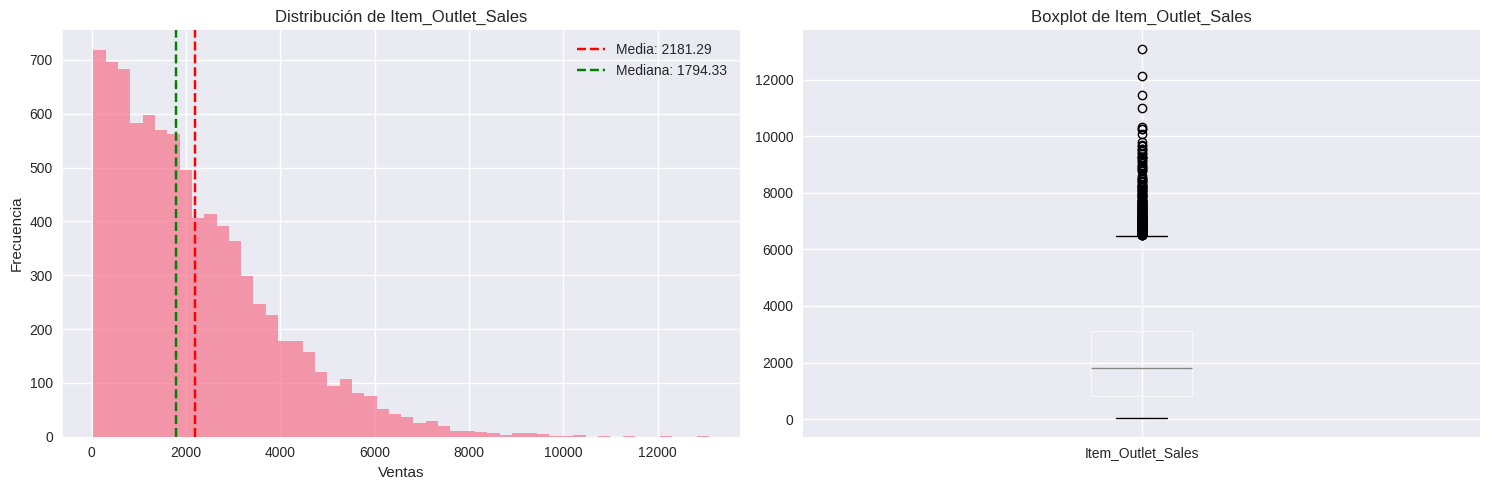


ANÁLISIS DE BALANCE:
------------------------------
Asimetría: 1.18

Distribución por rangos de ventas:
  (20.236, 2644.025]: 5728 registros (67.2%)
  (2644.025, 5254.76]: 2256 registros (26.5%)
  (5254.76, 7865.495]: 483 registros (5.7%)
  (7865.495, 10476.23]: 52 registros (0.6%)
  (10476.23, 13086.965]: 4 registros (0.0%)

→ La variable objetivo está altamente sesgada, considerando transformación logarítmica


In [11]:
# Análisis de la variable objetivo
target_var = 'Item_Outlet_Sales'
print(f"ANÁLISIS DE LA VARIABLE OBJETIVO: {target_var}")
print("="*60)

# Estadísticas descriptivas
print("Estadísticas descriptivas:")
target_stats = df[target_var].describe()
display(pd.DataFrame(target_stats).T)

# Distribución
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma
df[target_var].hist(bins=50, ax=axes[0], alpha=0.7)
axes[0].axvline(df[target_var].mean(), color='red', linestyle='--', label=f'Media: {df[target_var].mean():.2f}')
axes[0].axvline(df[target_var].median(), color='green', linestyle='--', label=f'Mediana: {df[target_var].median():.2f}')
axes[0].set_title('Distribución de Item_Outlet_Sales')
axes[0].set_xlabel('Ventas')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()

# Boxplot
df.boxplot(column=target_var, ax=axes[1])
axes[1].set_title('Boxplot de Item_Outlet_Sales')

plt.tight_layout()
plt.show()

# Análisis de balance
print("\nANÁLISIS DE BALANCE:")
print("-" * 30)
target_skew = df[target_var].skew()
print(f"Asimetría: {target_skew:.2f}")

# Crear categorías para análisis de distribución
sales_bins = pd.cut(df[target_var], bins=5)
bin_counts = sales_bins.value_counts().sort_index()
print("\nDistribución por rangos de ventas:")
for bin_range, count in bin_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {bin_range}: {count} registros ({percentage:.1f}%)")

if abs(target_skew) > 1:
    print("\n→ La variable objetivo está altamente sesgada, considerando transformación logarítmica")
elif abs(target_skew) > 0.5:
    print("\n→ La variable objetivo está moderadamente sesgada")

## 7. Análisis de Correlaciones entre Variables Numéricas

MATRIZ DE CORRELACIÓN - VARIABLES NUMÉRICAS


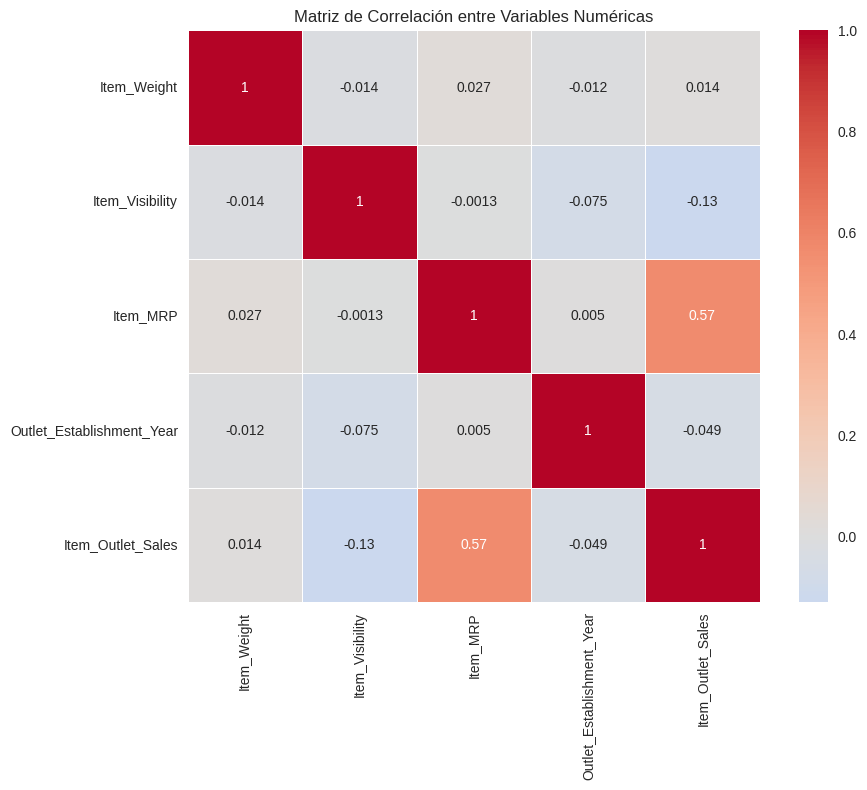


CORRELACIONES CON LA VARIABLE OBJETIVO (Item_Outlet_Sales):
----------------------------------------------------------------------
Item_MRP: 0.568 (FUERTE correlación positiva)
Item_Weight: 0.014 (DÉBIL correlación positiva)
Outlet_Establishment_Year: -0.049 (DÉBIL correlación negativa)
Item_Visibility: -0.129 (DÉBIL correlación negativa)

CORRELACIONES ENTRE VARIABLES PREDICTORAS (|corr| > 0.5):
----------------------------------------------------------------------
No hay correlaciones fuertes entre variables predictoras


In [12]:
# Matriz de correlación
print("MATRIZ DE CORRELACIÓN - VARIABLES NUMÉRICAS")
print("="*60)

correlation_matrix = df[numeric_cols].corr()

# Visualización
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

# Correlaciones más fuertes con la variable objetivo
print("\nCORRELACIONES CON LA VARIABLE OBJETIVO (Item_Outlet_Sales):")
print("-" * 70)
target_correlations = correlation_matrix[target_var].sort_values(ascending=False)
for var, corr in target_correlations.items():
    if var != target_var:
        strength = "FUERTE" if abs(corr) > 0.5 else "MODERADA" if abs(corr) > 0.3 else "DÉBIL"
        direction = "positiva" if corr > 0 else "negativa"
        print(f"{var}: {corr:.3f} ({strength} correlación {direction})")

# Correlaciones entre variables predictoras
print("\nCORRELACIONES ENTRE VARIABLES PREDICTORAS (|corr| > 0.5):")
print("-" * 70)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5 and correlation_matrix.columns[i] != target_var and correlation_matrix.columns[j] != target_var:
            high_corr_pairs.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    for var1, var2, corr in high_corr_pairs:
        print(f"{var1} - {var2}: {corr:.3f}")
else:
    print("No hay correlaciones fuertes entre variables predictoras")

## 8. Análisis de Outliers

ANÁLISIS DE OUTLIERS EN VARIABLES NUMÉRICAS


,outliers_count,outliers_percent,lower_bound,upper_bound
Item_Outlet_Sales,186.0,2.182330,-2566.326100,6501.869900
Item_Visibility,144.0,1.689546,-0.074404,0.195979
Item_Weight,0.0,0.000000,-3.340625,28.964375
Item_MRP,0.0,0.000000,-43.899300,323.369500
Outlet_Establishment_Year,0.0,0.000000,1961.500000,2029.500000


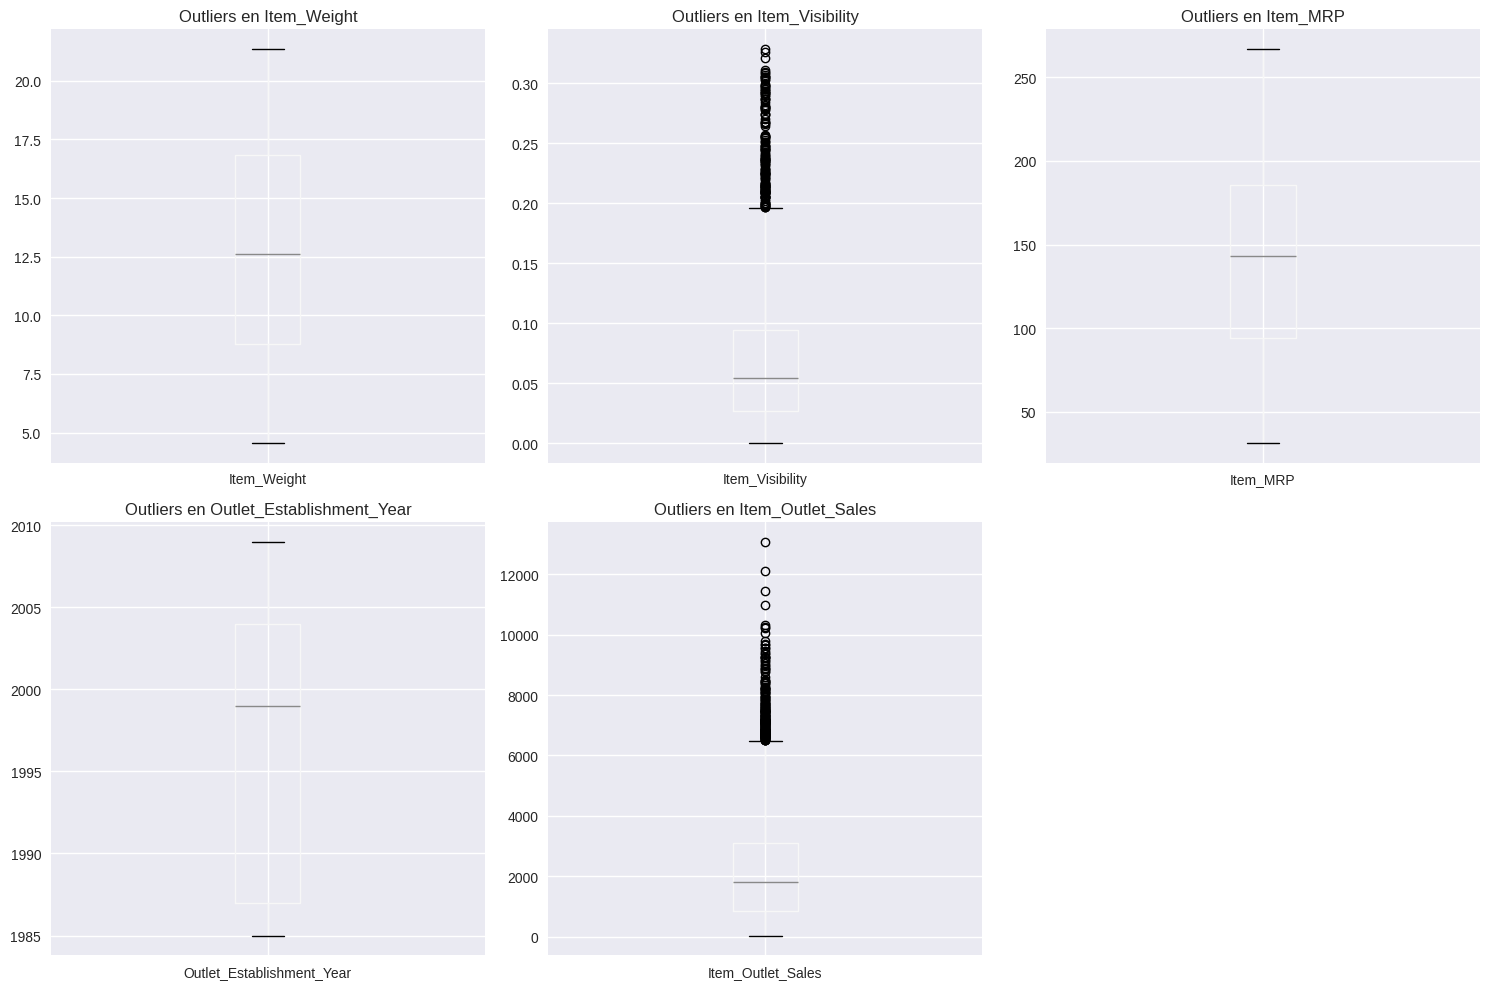


VARIABLES CON MÁS OUTLIERS:
----------------------------------------


In [13]:
# Análisis de outliers usando IQR
print("ANÁLISIS DE OUTLIERS EN VARIABLES NUMÉRICAS")
print("="*60)

outliers_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count = len(outliers)
    outliers_percent = (outliers_count / len(df)) * 100
    
    outliers_summary[col] = {
        'outliers_count': outliers_count,
        'outliers_percent': outliers_percent,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

# Mostrar resumen
outliers_df = pd.DataFrame(outliers_summary).T
outliers_df = outliers_df.sort_values('outliers_percent', ascending=False)
display(outliers_df)

# Visualización de outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'Outliers en {col}')

# Eliminar ejes vacíos
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

print("\nVARIABLES CON MÁS OUTLIERS:")
print("-" * 40)
for col, stats in outliers_summary.items():
    if stats['outliers_percent'] > 5:
        print(f"{col}: {stats['outliers_count']} outliers ({stats['outliers_percent']:.1f}%)")

## 9. Análisis Bivariado: Relación entre Variables y Target

ANÁLISIS BIVARIADO: VARIABLES NUMÉRICAS VS TARGET


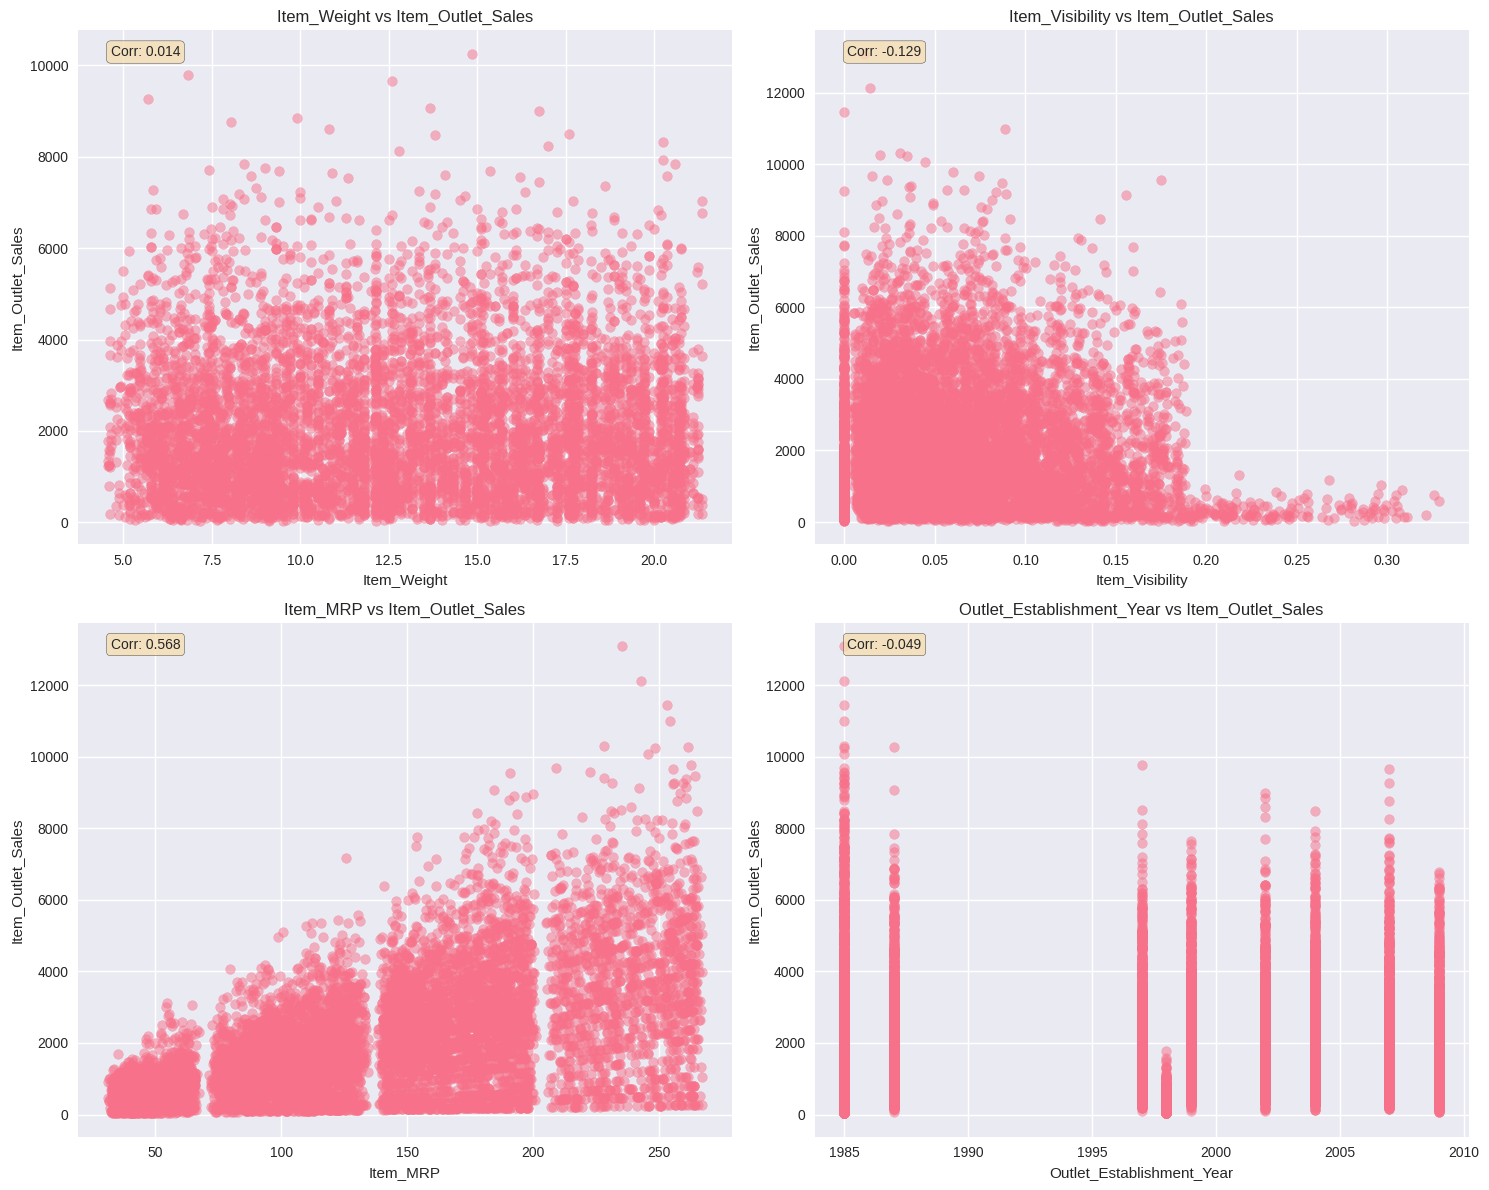

In [14]:
# Análisis bivariado: Variables numéricas vs Target
print("ANÁLISIS BIVARIADO: VARIABLES NUMÉRICAS VS TARGET")
print("="*70)

# Scatter plots para variables numéricas vs target
predictor_numeric = [col for col in numeric_cols if col != target_var]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(predictor_numeric):
    if i < len(axes):
        axes[i].scatter(df[col], df[target_var], alpha=0.5)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target_var)
        axes[i].set_title(f'{col} vs {target_var}')
        
        # Calcular correlación
        corr = df[col].corr(df[target_var])
        axes[i].text(0.05, 0.95, f'Corr: {corr:.3f}', 
                   transform=axes[i].transAxes, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

ANÁLISIS BIVARIADO: VARIABLES CATEGÓRICAS VS TARGET

VENTAS PROMEDIO POR ITEM_FAT_CONTENT:
  Regular: 2235.19
  Low Fat: 2164.48
  low fat: 2087.74
  LF: 2073.55
  reg: 1962.19

VENTAS PROMEDIO POR OUTLET_SIZE:
  Medium: 2681.60
  High: 2299.00
  Small: 1912.15

VENTAS PROMEDIO POR OUTLET_LOCATION_TYPE:
  Tier 2: 2323.99
  Tier 3: 2279.63
  Tier 1: 1876.91

VENTAS PROMEDIO POR OUTLET_TYPE:
  Supermarket Type3: 3694.04
  Supermarket Type1: 2316.18
  Supermarket Type2: 1995.50
  Grocery Store: 339.83


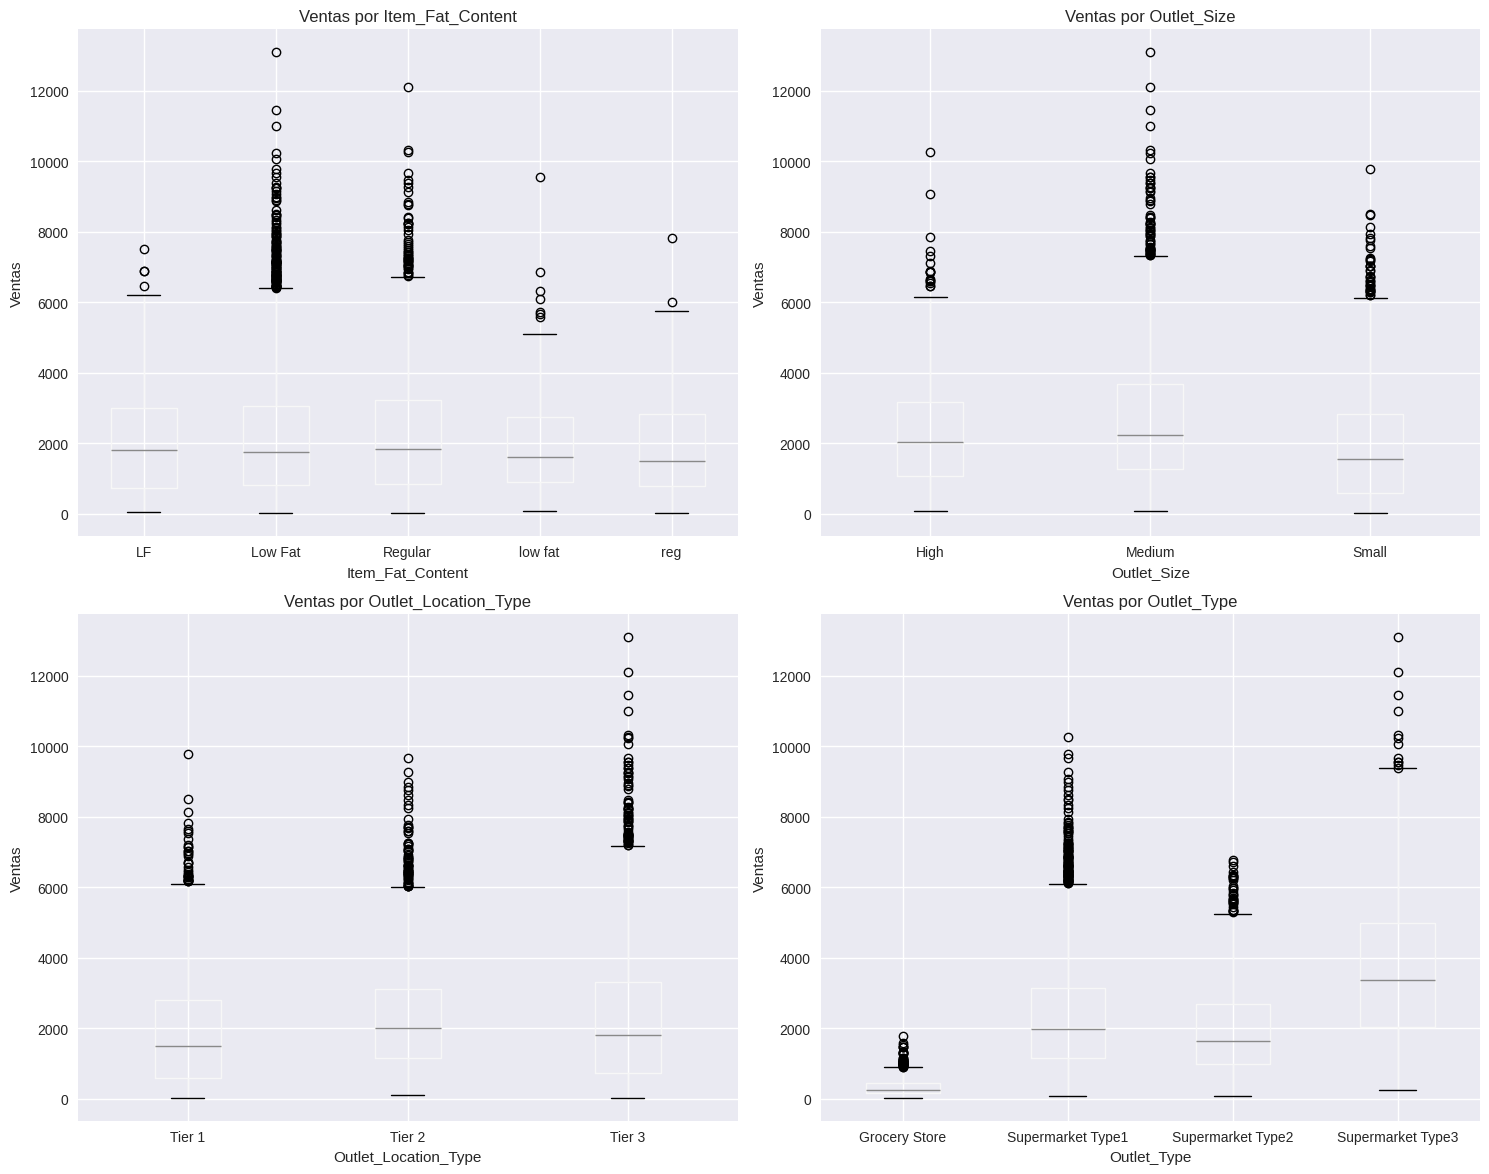

In [15]:
# Análisis bivariado: Variables categóricas vs Target
print("ANÁLISIS BIVARIADO: VARIABLES CATEGÓRICAS VS TARGET")
print("="*70)

# Seleccionar variables categóricas con menos categorías para mejor visualización
categorical_for_analysis = [col for col in categorical_cols 
                          if col not in ['Item_Identifier', 'Outlet_Identifier'] 
                          and df[col].nunique() <= 10]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_for_analysis):
    if i < len(axes):
        # Boxplot por categoría
        df.boxplot(column=target_var, by=col, ax=axes[i])
        axes[i].set_title(f'Ventas por {col}')
        axes[i].set_ylabel('Ventas')
        
        # Calcular ventas promedio por categoría
        avg_sales = df.groupby(col)[target_var].mean().sort_values(ascending=False)
        print(f"\nVENTAS PROMEDIO POR {col.upper()}:")
        for category, sales in avg_sales.items():
            print(f"  {category}: {sales:.2f}")

plt.suptitle('')  # Eliminar título automático
plt.tight_layout()
plt.show()

## Resumen Ejecutivo del EDA

In [16]:
print("RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO DE DATOS")
print("="*70)
print("\nHALLazgos PRINCIPALES:")
print("-" * 50)

# 1. Estructura del dataset
print("1. ESTRUCTURA DEL DATASET:")
print(f"   • Dimensiones: {df.shape[0]} registros, {df.shape[1]} variables")
print(f"   • 1559 productos únicos distribuidos en 10 tiendas")
print(f"   • Variables: {len(numeric_cols)} numéricas, {len(categorical_cols)} categóricas")

# 2. Calidad de datos
missing_cols = missing_df['Columna'].tolist() if 'missing_df' in locals() and len(missing_df) > 0 else []
print(f"\n2. CALIDAD DE DATOS:")
print(f"   • Variables con valores faltantes: {len(missing_cols)}")
if missing_cols:
    print(f"   • Columnas afectadas: {', '.join(missing_cols)}")
print(f"   • Registros duplicados: {exact_duplicates}")
print(f"   • Duplicados en clave producto-tienda: {key_duplicates}")

# 3. Variable objetivo
print(f"\n3. VARIABLE OBJETIVO (Item_Outlet_Sales):")
print(f"   • Rango: {df[target_var].min():.2f} - {df[target_var].max():.2f}")
print(f"   • Media: {df[target_var].mean():.2f}, Mediana: {df[target_var].median():.2f}")
print(f"   • Asimetría: {target_skew:.2f} (distribución sesgada a la derecha)")

# 4. Correlaciones importantes
print(f"\n4. CORRELACIONES DESTACADAS:")
top_corr = target_correlations.head(3)
for var, corr in top_corr.items():
    if var != target_var:
        print(f"   • {var}: {corr:.3f}")

# 5. Outliers
high_outliers = [(col, stats['outliers_percent']) for col, stats in outliers_summary.items() 
                if stats['outliers_percent'] > 10]
print(f"\n5. OUTLIERS CRÍTICOS (>10%):")
if high_outliers:
    for col, percent in high_outliers:
        print(f"   • {col}: {percent:.1f}%")
else:
    print("   • No hay variables con más del 10% de outliers")

# 6. Recomendaciones para clustering
print(f"\n6. RECOMENDACIONES PARA FASE DE CLUSTERING:")
print("   • Tratar valores faltantes en Item_Weight y Outlet_Size")
print("   • Estandarizar variables numéricas debido a diferentes escalas")
print("   • Considerar transformación logarítmica para variables sesgadas")
print("   • Codificar variables categóricas para el algoritmo de clustering")
print("   • Considerar reducir dimensionalidad si hay alta correlación entre variables")

print("\n" + "="*70)
print("✓ ANÁLISIS EXPLORATORIO COMPLETADO")

RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO DE DATOS

HALLazgos PRINCIPALES:
--------------------------------------------------
1. ESTRUCTURA DEL DATASET:
   • Dimensiones: 8523 registros, 12 variables
   • 1559 productos únicos distribuidos en 10 tiendas
   • Variables: 5 numéricas, 7 categóricas

2. CALIDAD DE DATOS:
   • Variables con valores faltantes: 2
   • Columnas afectadas: Outlet_Size, Item_Weight
   • Registros duplicados: 0
   • Duplicados en clave producto-tienda: 0

3. VARIABLE OBJETIVO (Item_Outlet_Sales):
   • Rango: 33.29 - 13086.96
   • Media: 2181.29, Mediana: 1794.33
   • Asimetría: 1.18 (distribución sesgada a la derecha)

4. CORRELACIONES DESTACADAS:
   • Item_MRP: 0.568
   • Item_Weight: 0.014

5. OUTLIERS CRÍTICOS (>10%):
   • No hay variables con más del 10% de outliers

6. RECOMENDACIONES PARA FASE DE CLUSTERING:
   • Tratar valores faltantes en Item_Weight y Outlet_Size
   • Estandarizar variables numéricas debido a diferentes escalas
   • Considerar transforma